# Data Aggregation with `groupby()`

<center><img src="../images/stock/pexels-caleboquendo-7772561.jpg"></center>

In this lesson, we'll explore data aggregation using the `groupby()` method. 

## Getting Started

### Import Libraries

First, we'll bring in the essential tools we'll need for this lesson:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
````



In [1]:
## Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

Next, we'll load the `Pokémon` dataset.

This `Pokémon` dataset contains various details on Pokémon.

__Columns:__

* __`#`__: The unique identifier or Pokédex number.

* __`Name`__: The name of the Pokémon (including Mega Evolutions).

* __`Type 1`__: The primary elemental type (Grass, Fire, Water, etc.).

* __`Type 2`__: The secondary elemental type. This is missing for single-type Pokémon.

* __`Total`__: The sum of all six base stats.

* __`HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`__: The individual base stats that determine battle performance.

* __`Generation`__: The generation number in which the Pokémon was introduced.

* __`Legendary`__: A boolean (`True`/`False`) indicating if the Pokémon is a Legendary/Mythical creature.


In [2]:
## Load and Preview Dataset
file = "../data/pokemon.csv"

pokemon_df = pd.read_csv(file)

### Inspect the Dataset

Before we start grouping and aggregating, it's always a good idea to get a feel for our data. Let's use the `.info()` method on our DataFrame to get a summary of its structure.

In [3]:
## View Key Information on the Dataset
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Data Cleaning (Lite)

As noted from the `.info()` output, it seems our dataset contains some missing values. 

`Type 2` is missing a significant amount of information.
It turns out that many Pokémon only have a single Type.

What should we do?

In [4]:
## View Rows Containing Null Values
pokemon_df["Type 2"] = pokemon_df["Type 2"].fillna("None")

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Visualizing All Numerical Distributions (Subplots)

To quickly get familiar with our numerical data, let's visualize the distribution across the entire dataset.

We can quickly generate a grid of histograms for every numerical column in our DataFrame using the built-in Pandas `.hist()` function. This creates a multi-panel chart known as a subplot.

Because subplots can often overlap, we use `plt.subplots_adjust()` to manually set the horizontal (`wspace`) and vertical (`hspace`) padding, ensuring all titles and labels are legible.

__Syntax__:
```python
# Create the figure object (optional, but good for control)
plt.figure(figsize=(WIDTH, HEIGHT))

# Generate the Subplots
DataFrame.hist(
    figsize=(WIDTH, HEIGHT),
    bins=NUMBER_OF_BINS,
    edgecolor="COLOR"
)

# Adjust Spacing
plt.subplots_adjust(
    hspace=VERTICAL_SPACE_RATIO,
    wspace=HORIZONTAL_SPACE_RATIO
)

# Customize Plot
plt.suptitle("Title")

# Show the Plot
plt.show() # Used when running in a script/environment that needs explicit display
```

<Figure size 1000x700 with 0 Axes>

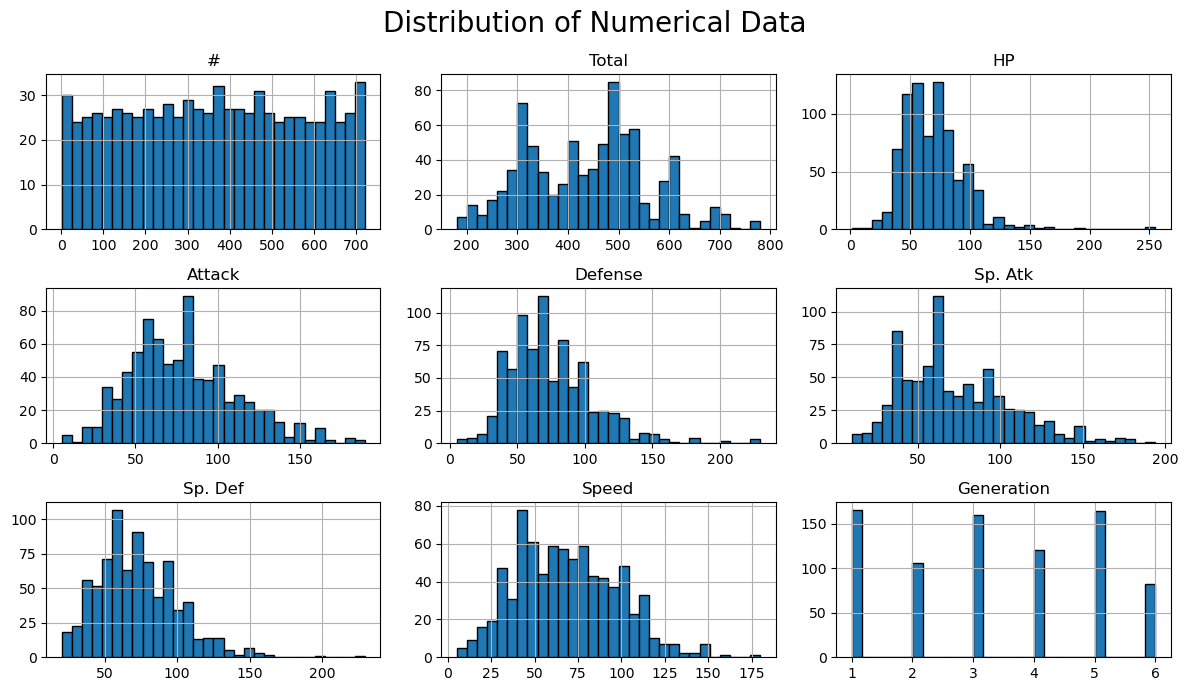

In [5]:
# Draw Figure
plt.figure(figsize=(10,7))

# Generate Plot
pokemon_df.hist(figsize=(12,7),
       bins=30,
      edgecolor="black")

plt.subplots_adjust(hspace=0.7,
                    wspace=0.4)

# Customize Plot
plt.suptitle("Distribution of Numerical Data", size = 20)
plt.tight_layout()

## Split-Apply-Combine: The Concept Behind Groupby

<center><img src="../images/stock/pexels-mark-enkey-2156438346-34524495.jpg"></center>

The `groupby()` method is based on the split-apply-combine strategy:

* __Split:__ The data is divided into groups based on one or more columns.

* __Apply:__ You apply a function (e.g., mean, sum, count) to each group independently.

* __Combine:__ The results from each group are combined into a new data structure.

### Applying Groupby

Let's break down the `groupby()` method step by step.

* What is a Groupby Object?

    * When you apply the `groupby()` method to a DataFrame, it doesn't immediately perform calculations. 
    * Instead, it creates a DataFrameGroupBy object. 
    * This object contains information about how the data has been split into groups, but the calculations are deferred until you specify an aggregation function.

__Syntax__

The basic syntax for `groupby()` is:

```python
df.groupby(column_name)
```

* `df`: The Pandas DataFrame you want to group.

* `column_name`: The column name (or a list of column names) that you want to group the data by.

### Grouping by Type 1

Let's start with a by grouping our DataFrame based on the `Type 1` column. 

This will categorize our data into several groups such as `Dragon`, `Fighting`, `Grass`, `Rock`, and so on.

In [6]:
## Begin Example
pokemon_grouped_by_type = pokemon_df.groupby("Type 1")
pokemon_grouped_by_type

The output of `.groupby()` will be a `DataFrameGroupBy` object. 

This object signifies that the data has been successfully organized into groups based on the unique values in the selected column. 

However, it's important to remember that this is an intermediate step. No actual calculations or aggregations have been applied to these groups yet. 

To gain meaningful insights, we need to tell apply the operations we want to perform on each of these groups, such as calculating the mean, sum, or count of specific columns. 

The DataFrameGroupBy object provides the structure for these subsequent aggregation operations.

## Applying Aggregation Functions

<center><img src="../images/stock/pexels-anton-8100-243698.jpg"></center>

With our data now organized into groups based on the `Type 1` of the Pokemon, the next step is to apply aggregation functions. 

These functions allow us to calculate summary statistics for each group, providing us with insights into the characteristics of Pokemon based on their type. 

Let's explore some common aggregation functions in Pandas.

### Mean

Which Pokemon Type, on average, has the greatest Attack Power? 

We can calculate the average `Attack` for each Pokemon Type by using the `.mean()` aggregation function.

__Syntax__

```python
DataFrame.groupby('Categorical_Column')['Numerical_Column'].Aggregation_Function()
```

Let's apply this to our group object.

In [7]:
## Begin Calculation
pokemon_type_attack_mean = pokemon_grouped_by_type["Attack"].mean()
pokemon_type_attack_mean

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

### Visualize

Once we perform an aggregation with `groupby()`, the resulting data structure is a Pandas Series, where the grouping column is used as the index.

Before generating a visualization with plotting libraries like `Seaborn`, we typically need the index (the groups) to be treated as a regular data column in a DataFrame. This is done by resetting the index.

Syntax:

```python
Aggregated_Series.reset_index(name='New_Column_Name')
```

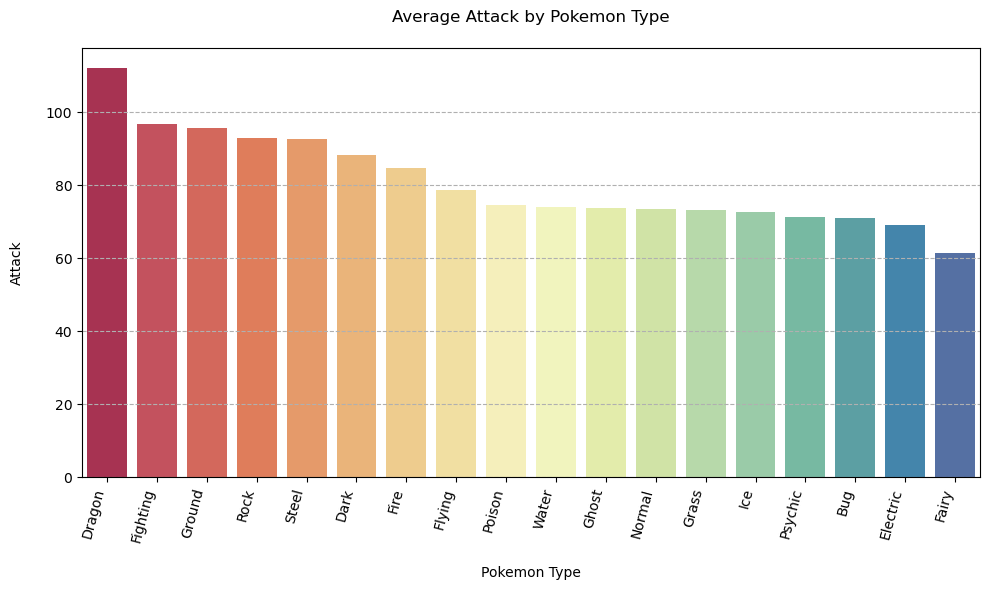

In [8]:
# Visualize Average Attack x Pokemon Type

# Convert Groupby Series into a DataFrame by Reseting the Index
pokemon_type_attack_mean = pokemon_type_attack_mean.reset_index("Type 1")

# Sort by Attack
pokemon_type_attack_mean = pokemon_type_attack_mean.sort_values(by="Attack", ascending=False)

# Draw Figure
plt.figure(figsize=(10,6))

# Draw Plot
sns.barplot(
    data=pokemon_type_attack_mean,
    x="Type 1",
    y="Attack",
    hue="Type 1",
palette="Spectral")
    
# Customize
plt.title("Average Attack by Pokemon Type\n")
plt.xlabel("\nPokemon Type")
plt.xticks(rotation=75, ha="right")
plt.ylabel("Attack\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

### Count

Let's get the count of Pokémon by their primary Type.

In [9]:
## Perform Calculation
pokemon_type_counts = pokemon_grouped_by_type["Attack"].count()

# Output Results
pokemon_type_counts = pokemon_type_counts.sort_values(ascending=False)

pokemon_type_counts

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Attack, dtype: int64

Now let's follow up with a visualization.

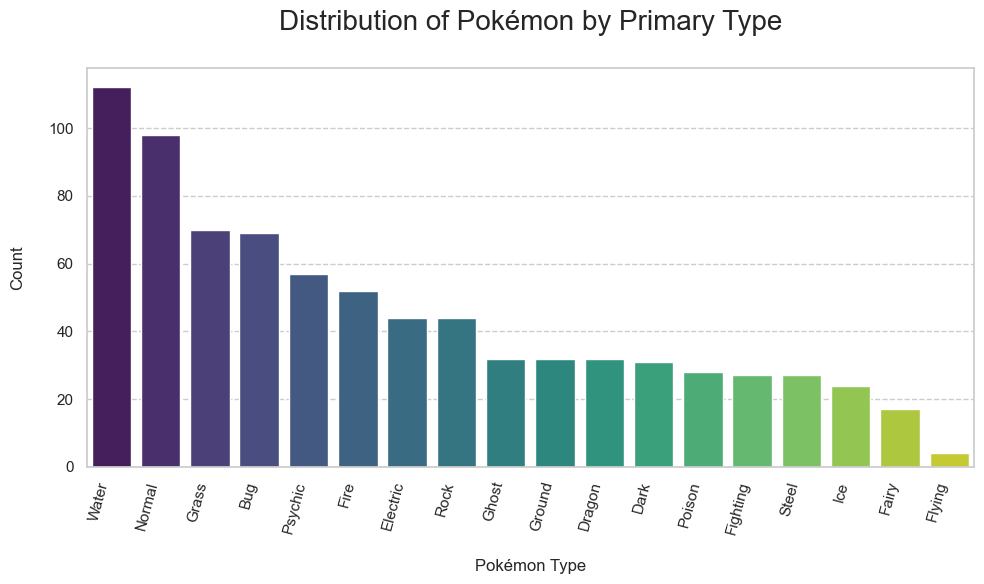

In [10]:
# Visualize Counts

# Convert Groupby Series into a DataFrame by Reseting the Index
pokemon_type_counts_df = pokemon_type_counts.reset_index(name="Count")

# Draw Figure
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))

# Draw Plot
sns.barplot(
    data=pokemon_type_counts_df,
    x="Type 1",
    y="Count",
    hue="Type 1",
    palette="viridis"
)
    
# Customize
plt.title("Distribution of Pokémon by Primary Type\n",
         size=20)
plt.xlabel("\nPokémon Type")
plt.xticks(rotation=75, ha="right")
plt.ylabel("Count\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

### Groupby Revisited

When we use `.groupby()`, imagine sorting your entire dataset into separate bins, where each bin holds rows that share the same value in a specific column. 

In our case with the `Pokémon` dataset, we used `.groupby('Type 1')` to create distinct groups: one containing all Dragon types, another for Ghost types, another for Water types, and so on.

<center> Original Data Set</center>

| Name | Type 1 | Type 2 | Attack |
|------|--------|--------|--------|
| Pikachu |	Electric |	- | 55 |
| Bulbasaur | Grass |	Poison | 49 |
| Squirtle | Water |	- |	48 |
| ... | ... | ... | ... |

<center>Electric Group</center>

| Name | Type 1 | Type 2 | Attack |
|------|--------|--------|--------|
|Pikachu	|Electric|	-	|55|
|Jolteon	|Electric|	-	|65|
|Raichu	|Electric|	-	|85|
|...|...|...|...|

<center>Water Group</center>

| Name | Type 1 | Type 2 | Attack |
|------|--------|--------|--------|
|Squirtle|	Water|	-	|48|
|Vaporeon|	Water|	-	|65|
|Gyarados|	Water|	Flying|	125|
|...	|...	|...|	...|

<center>Fire Group</center>

| Name | Type 1 | Type 2 | Attack |
|------|--------|--------|--------|
|Charmander	|Fire	|-	|52|
|Charizard	|Fire	|Flying|	84|
|Flareon	|Fire	|-	|130|
|...	|...	|...	|...|

         
Once these groups are formed, we apply the `.count()` aggregate function to the `Name` column (or any other non-null column). 

This effectively counts the number of rows (the number of Pokémon) in each individual type-specific group.

<center>The Resulting Series of Pokémon Counts</center>

|Type 1|	Count|
|---|---|
|Bug|	69|
|Dark|	31|
|Dragon|	32|
|Electric|	59|
|Fire|	52|
|Flying|	4|
|Grass|	78|
|Water|	127|
|...|	...|


`.groupby()` allows us to analyze trends and differences across various categories within our data, providing insights that might be hidden in the overall dataset.

### Other Useful Aggregation Functions

Here are some other commonly used aggregation functions:

* __`sum()`__: Total of all values in each group.

* __`min()`__: Minimum value in each group.

* __`max()`__: Maximum value in each group.

* __`any()`__: Returns True if any value in the group is True.

* __`all()`__: Returns True if all values in the group are True.

* __`median()`__: Median value of each group.

* __`std()`__: Standard deviation of each group.

## Groupby Multiple Columns

<center><img src="../images/stock/pexels-introspectivedsgn-9661252.jpg"></center>

The power of `.groupby()` extends beyond just a single column. 

You can also group your data based on the unique combinations of values from multiple columns. This allows for even more granular analysis and the creation of more specific subgroups within your data. 

When you group by multiple columns, the resulting structure will have a hierarchical index (also known as a MultiIndex), reflecting the different levels of grouping you've applied.

Let's build upon our previous example and perform a more detailed analysis. We'll group our DataFrame by both `Type 1` and `Type 2`, and then calculate the count of each unique combination of these two factors. 

In [11]:
# Group by Type 1 and Type 2
pokemon_grouped_by_dual_type = pokemon_df.groupby(["Type 1", "Type 2"])
pokemon_grouped_by_dual_type

In [12]:
# Get Count
pokemon_dual_type_counts = pokemon_grouped_by_dual_type["Name"].count()

pokemon_dual_type_counts.head(40)

Type 1    Type 2  
Bug       Electric     2
          Fighting     2
          Fire         2
          Flying      14
          Ghost        1
          Grass        6
          Ground       2
          None        17
          Poison      12
          Rock         3
          Steel        7
          Water        1
Dark      Dragon       3
          Fighting     2
          Fire         3
          Flying       5
          Ghost        2
          Ice          2
          None        10
          Psychic      2
          Steel        2
Dragon    Electric     1
          Fairy        1
          Fire         1
          Flying       6
          Ground       5
          Ice          3
          None        11
          Psychic      4
Electric  Dragon       1
          Fairy        1
          Fire         1
          Flying       5
          Ghost        1
          Grass        1
          Ice          1
          None        27
          Normal       2
          Steel        3
      

### Multi-Index
When you group a DataFrame by multiple columns, such as `Type 1` and `Type 2`, the resulting Series or DataFrame often has a __MultiIndex__. This means that the index itself has multiple levels, corresponding to the columns you used in the `.groupby()` operation.

In the case of grouping by `Type 1` and `Type 2`, the resulting Series from calculating the count of Pokémon would have a __MultiIndex__ where the first level is `Type 1` and the second level is `Type 2`.

__Accessing Values__
To access a specific value (like the count of a specific dual-type Pokémon) in a Series or DataFrame with a MultiIndex, you can use `.loc[]` with a tuple containing the values for each level of the index.

Syntax:

```python
aggregated_series.loc[(Value_A, Value_B)]
```

The order in the tuple is critica as it must correspond exactly to the order of the columns you used in the `groupby()` function.

Let's practice accessing the Multi-Index in the cells below:

In [13]:
## Accessing 1 Level of the Multi-Index (Choose Your Type)
pokemon_dual_type_counts.loc[("Electric",)]

Type 2
Dragon     1
Fairy      1
Fire       1
Flying     5
Ghost      1
Grass      1
Ice        1
None      27
Normal     2
Steel      3
Water      1
Name: Name, dtype: int64

In [14]:
## Accessing 2 Levels of the Multi-Index (Choose Your (Type, Type))
pokemon_dual_type_counts.loc[("Dragon", "Electric")].item()

1

### Resetting the Index

As we've seen, grouping by multiple columns creates a hierarchical index (MultiIndex) in the resulting Pandas Series or DataFrame. Sometimes it's more convenient to have the grouping columns as regular, flat columns in the DataFrame.

To achieve this, we can use the `.reset_index()` method on the Series or DataFrame that results from the `.groupby()` operation. This will convert the levels of the MultiIndex into new columns with their respective names, and a new default integer index will be assigned to the DataFrame.

Let's apply `.reset_index()` to our MultiIndex Series.

__Note__:
* When using `.reset_index()` on a Series, the resulting column that holds the aggregated values (the counts, sums, means, etc.) will default to the name of the column you aggregated (`Name` if you counted names for example).
* The `name=` parameter should be used to assign a descriptive label to the new column.

In [15]:
## Reset the Index
pokemon_dual_type_counts_df = pokemon_dual_type_counts.reset_index(name="Count")

## Preview the Data
pokemon_dual_type_counts_df.head(24)

,Type 1,Type 2,Count
0,Bug,Electric,2
1,Bug,Fighting,2
2,Bug,Fire,2
3,Bug,Flying,14
4,Bug,Ghost,1
5,Bug,Grass,6
6,Bug,Ground,2
7,Bug,None,17
8,Bug,Poison,12
9,Bug,Rock,3


The `.reset_index()` operation transforms the MultiIndex Series into a Pandas DataFrame. 

The `Type 1` and `Type 2` that were previously part of the hierarchical index are now converted into regular columns within this DataFrame. 

A new, simple numerical index is automatically assigned to the rows, and the count values are stored in a column named `Count`. 

This DataFrame format is often more convenient for subsequent analysis and visualization, especially when tools expect the grouping variables as distinct columns.

## Applying Multiple Aggregation Functions with `.agg()`

<center><img src="../images/stock/pexels-caleboquendo-7708407.jpg"></center>

`.mean()` and `.sum()` allow us to calculate a single statistic for each type group, the`.agg()` method can apply multiple aggregation functions simultaneously. This is incredibly useful for getting a comprehensive summary of your grouped data.

The `.agg()` method accepts a variety of arguments:

* __A single aggregation function:__ This works just like calling the function directly on the grouped selection. For example, grouping by `'Type 1'` and applying `.agg('mean')` on the `'Attack'` column would give you the average Attack for each type.

Example Syntax
```python
df.groupby('Grouping_Col')['Value_Col'].agg('mean')
```

* __A list of aggregation functions:__ You can pass a list of function names (as strings) or the function objects themselves, letting you see multiple stats for a column. For example, you could see the min, max, and mean Attack for every type.

Example Syntax
```python
# Calculates the min, max, mean, and sum of 'Value_Col' for every 'Grouping_Col' category
df.groupby('Grouping_Col')['Value_Col'].agg(['min', 'max', 'mean'])
```

* __A dictionary for custom column aggregations:__  Keys are the columns and the values are the aggregation function(s) you want to apply to that column. This allows you to apply different summary statistics to different columns within the same `.groupby()` operation

Example Syntax
```python
# Calculates the mean of 'Price' AND the min and max of 'Quantity'
# for every category in 'Category_ID'.
df.groupby('Category_ID').agg(
    {
        'Price': 'mean',
        'Quantity': ['min', 'max', 'sum']
    }
)
```


### Applying Multiple Aggregations to One Column

To get a richer understanding of a single Pokémon attribute across our groups, we can use the `.agg()` method to calculate several summary statistics simultaneously.

In the following example, we'll group our data by `Type 1` and then apply multiple aggregation functions to the `Attack` column. This gives us a comprehensive overview of the offensive capabilities for Pokémon of each primary type.

Using `groupby()` and `.agg()`, let's determine the mean, minimum, and maximum `Attack` values by Primary Pokémon Type:

In [16]:
## Begin Example
attack_summary = pokemon_df.groupby("Type 1")["Attack"].agg(["mean",
                                                             "min",
                                                             "max"]
                                                           )

attack_summary

,mean,min,max
Type 1,,,
Bug,70.971014,10,185
Dark,88.387097,50,150
Dragon,112.125000,50,180
Electric,69.090909,30,123
Fairy,61.529412,20,131
Fighting,96.777778,35,145
Fire,84.769231,30,160
Flying,78.750000,30,115
Ghost,73.781250,30,165


```python
pokemon_df.groupby("Type 1")["Attack"].agg(["mean",
                                            "min", 
                                            "max"])
```

selects the `Type 1` column for each origin group and then calculates the `mean`, `minimum`, and `maximum` values within that group.

The result is a DataFrame where the index is `Type 1` and the columns are the aggregation function results.

### Melting

<center><img src="../images/stock/pexels-ds-stories-9227955.jpg"></center>

Before we can visualize this Aggregate Data with Seaborn, we have to melt it.

__What is Melting?__
Melting transforms a DataFrame by consolidating one or more columns that contain values into a single column.

* __Wide Format (Pre-Melt):__ Data where a row represents a single observation and each variable (like `min`, `mean`, `max`) has its own column. This is often the result of an aggregation.

|Type 1|	mean|	min|	max|
|---|---|---|---|
|Dragon|	112.50|	50|	180|
|Fighting|	96.77|	35|	145|
|Fire	|88.08|	30|	130|

* __Long Format(Post-Melt):__ Data where a row represents a single measurement, and two new columns are created: one for the variable name (`min` or `max`) and one for its corresponding value (the actual number). 

|Type 1|	Statistic|	Attack Value|
|---|---|---|
|Dragon|	mean|	112.50|
|Fighting|	mean|	96.77|
|Fire|	mean|	88.08|
|Dragon|	min|	50.00|
|Fighting|	min|	35.00|
|Fire|	min|	30.00|
|Dragon|	max|	180.00|
|Fighting|	max|	145.00|
|Fire|	max|	130.00|

__Why Do We Melt?__
The primary reason to melt data is for visualization and consistent analysis. Visualization libraries like Seaborn are designed to work with long data where:

* The x or y axis is determined by a category column (like `Type 1`).

* The clustering/grouping is determined by a variable column (such as `Statistic`).

* The bar heights are determined by the value column (like `Attack Value`).

Melting converts the column headers (like `mean`, `min`, `max`) into usable row categories.

### How to Melt using `pd.melt()`

The Pandas function used is `pd.melt()`. It takes three main arguments:

__Generic Syntax__

```python
pd.melt(
    df,
    id_vars=['identifier_column'],
    value_vars=['column_to_unpivot_1', 'column_to_unpivot_2', '...'],
    var_name='new_variable_column_name',
    value_name='new_value_column_name'
)
```

Let's melt our Aggregation in the cell below:

In [17]:
## Melt
attack_summary_melted = attack_summary.reset_index().melt(
    id_vars="Type 1",
    value_vars=["mean", "min", "max"],
    var_name="Statistic",
    value_name="Attack Value"
)

attack_summary_melted.head(30)
## Melted

,Type 1,Statistic,Attack Value
0,Bug,mean,70.971014
1,Dark,mean,88.387097
2,Dragon,mean,112.125000
3,Electric,mean,69.090909
4,Fairy,mean,61.529412
5,Fighting,mean,96.777778
6,Fire,mean,84.769231
7,Flying,mean,78.750000
8,Ghost,mean,73.781250
9,Grass,mean,73.214286


### Visualizing the Data

Let's create a horizontal bar chart to graphically represent the data.

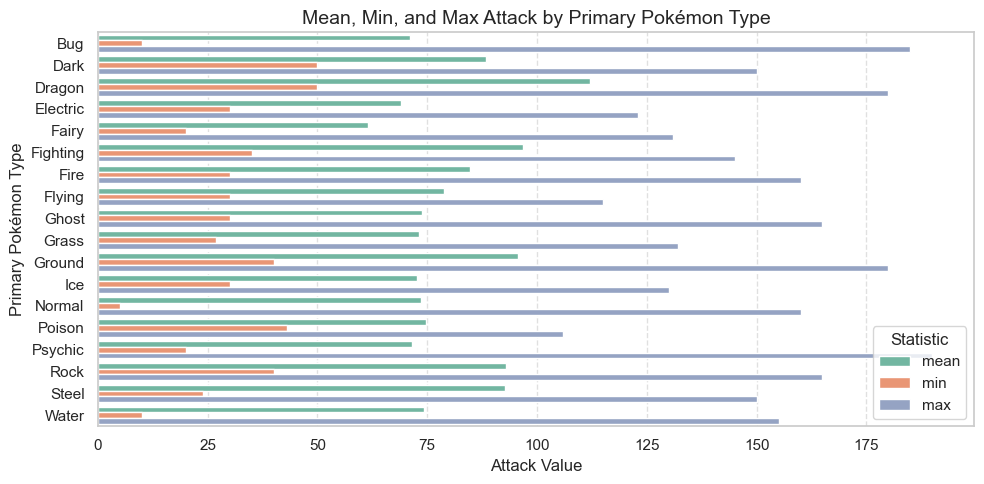

In [18]:
## Visualize the Data Based on the Melt

# Draw Figure
plt.figure(figsize=(10,5))


# Draw Plot
sns.barplot(data=attack_summary_melted,
            x="Attack Value",
            y="Type 1",
            hue="Statistic",
            palette="Set2")


# Customize
plt.title('Mean, Min, and Max Attack by Primary Pokémon Type', fontsize=14)
plt.ylabel('Primary Pokémon Type')
plt.xlabel('Attack Value')
plt.legend(title='Statistic')
plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.6)

### Applying Different Aggregations to Different Columns

We aren't limited to applying the same aggregation to all columns. Instead, we can specify __different summary statistics for different Pokémon attributes within__ our grouped object. This allows us to tailor our analysis to the specific characteristics of each variable.

In the following example, we'll group by `Type 1` and then calculate different statistics for `Attack`, `Defense`, `HP`, and `Name` to get a more nuanced understanding of the battle characteristics for each Pokémon type.

Specifically, we will use the following custom aggregations:

* For the `Attack column`, calculate both the `mean` and `maximum` (to see average offense and potential for a heavy hitter).

* For the `Defense` column, calculate the `mean` (to see average durability).

* For the `HP` column, we find the `median` (as a measure of typical health).

* For the `Name` column, we use `count` to determine the total number of Pokémon within each type group, giving us the sample size for each type.

In [19]:
## Begin Example
multi_agg_summary = pokemon_df.groupby("Type 1").agg(
    {
        "Attack": ["mean", "max"],
        "Defense": "mean",
        "HP": "median",
        "Name": "count"
    }
)

multi_agg_summary.head(30)

Attack          Defense     HP  Name
                mean  max        mean median count
Type 1                                            
Bug        70.971014  185   70.724638   60.0    69
Dark       88.387097  150   70.225806   65.0    31
Dragon    112.125000  180   86.375000   80.0    32
Electric   69.090909  123   66.295455   60.0    44
Fairy      61.529412  131   65.705882   78.0    17
Fighting   96.777778  145   65.925926   70.0    27
Fire       84.769231  160   67.769231   70.0    52
Flying     78.750000  115   66.250000   79.0     4
Ghost      73.781250  165   81.187500   59.5    32
Grass      73.214286  132   70.800000   65.5    70
Ground     95.750000  180   84.843750   75.0    32
Ice        72.750000  130   71.416667   70.0    24
Normal     73.469388  160   59.846939   70.0    98
Poison     74.678571  106   68.821429   67.5    28
Psychic    71.456140  190   67.684211   68.0    57
Rock       92.863636  165  100.795455   68.5    44
Steel      92.703704  150  126.370370   60.0    27
Water      74.151786  155   72.946429   70.0   112

```pokemon_df.groupby("Type 1").agg({...})``` allows us to specify which aggregation functions to apply to which columns.

The result is a dataframe with `Type 1` as the index and a hierarchical column structure where the first level is the column name (`Attack`, `Defense`, `HP`, `Name`) and the second level is the aggregation function applied.

### Melt and Visualize

#### Melting the Data

When melting the data, we will have to pay close attention to the columns as they are tuples.

Take a look by outputing the column names:

In [24]:
# Output Column Names

multi_agg_summary.columns

MultiIndex([( 'Attack',   'mean'),
            ( 'Attack',    'max'),
            ('Defense',   'mean'),
            (     'HP', 'median'),
            (   'Name',  'count')],
           )

In [43]:
# Melt the Data
multi_agg_summary_melted = pd.melt(
    multi_agg_summary.reset_index(),
    id_vars=[('Type 1', '')],
    value_vars=[
        ('Attack', 'mean'),
        ('Attack', 'max'),
        ('Defense', 'mean'),
        ('HP', 'median')
    ]
)

multi_agg_summary_melted.head()

,"(Type 1, )",variable_0,variable_1,value
0,Bug,Attack,mean,70.971014
1,Dark,Attack,mean,88.387097
2,Dragon,Attack,mean,112.125000
3,Electric,Attack,mean,69.090909
4,Fairy,Attack,mean,61.529412


In [44]:
# Rename Columns
column_dictionary = {("Type 1","" ): "primary type",
                     "variable_0": "battle stat",
                     "variable_1": "metric"}

multi_agg_summary_melted.rename(
    columns=column_dictionary, 
    inplace=True
)

multi_agg_summary_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   primary type  72 non-null     object 
 1   battle stat   72 non-null     object 
 2   metric        72 non-null     object 
 3   value         72 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.4+ KB


#### Visualizing the Data

Trying to visualize all of the data at once would be gross and confusing. Instead, let's focus on plotting a single battle stat in the cell below:

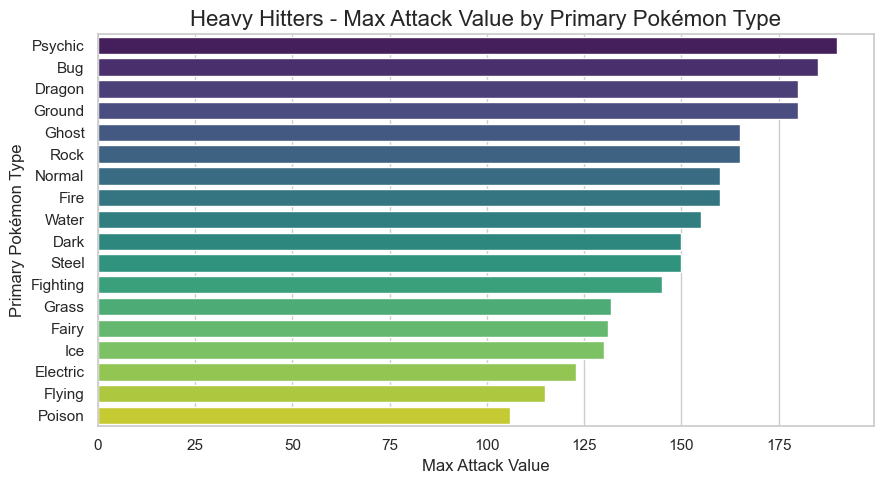

In [53]:
# Select Data
mask1 = multi_agg_summary_melted["metric"] == "max" 
mask2 = multi_agg_summary_melted["battle stat"] == "Attack"

max_attack_df = multi_agg_summary_melted[mask1 & mask2].sort_values(by="value",
                                                           ascending=False)
# Set Up Figure
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9,5))

# Generate Plot
sns.barplot(
    data=max_attack_df,
    y="primary type",
    x="value",
    hue="primary type",
    palette="viridis"
)

# Customize Figure
plt.title('Heavy Hitters - Max Attack Value by Primary Pokémon Type', fontsize=16)
plt.xlabel('Max Attack Value')
plt.ylabel('Primary Pokémon Type')
plt.tight_layout()

## Conclusion

<center><img src="../images/stock/pexels-abhishek-rana-422784-4188296.jpg"></center>

Now you've seen the power and flexibility of the `.groupby()` method in Pandas for segmenting your data and calculating insightful summary statistics for each group. We explored how to apply individual aggregation functions like `.mean()` and `.sum()`, and then expanded our toolkit with the versatile `.agg() method`, allowing us to calculate multiple statistics simultaneously across different columns. 

Furthermore, we learned how `.reset_index()` can transform the grouped output into a more conventional DataFrame structure, making it easier to work with for subsequent analysis and visualization, especially when tools expect grouping variables as regular columns.

As you continue your data exploration journey, remember that libraries like Seaborn can significantly enhance your visualizations of grouped data. Seaborn often works seamlessly with DataFrames created after a `groupby()` and `reset_index()` operation, providing more sophisticated plot types and aesthetics with less code.